In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

# 환자추출

In [116]:
a = np.load("./data/arr_2d.npy")
환자lab = pd.read_csv('/project/data/폐렴환자lab.csv').sort_values(by='SUBJECT_ID')
df = pd.DataFrame(a)
df['환자'] = 환자lab['SUBJECT_ID'].unique()
sub = df[df.iloc[:,:-1].sum(axis=1)>=5]['환자']
sub

0           9
1          21
2          31
3          36
4          37
        ...  
7794    99863
7795    99934
7796    99937
7797    99944
7798    99985
Name: 환자, Length: 6109, dtype: int64

In [70]:
data = pd.read_csv('./data/환자_Lab_data.csv')

In [71]:
data

,SUBJECT_ID,ITEMID,CHARTTIME,FLAG,EXPIRE_FLAG
0,9,50856,2149-11-09,NaN,1
1,9,50868,2149-11-09,NaN,1
2,9,50879,2149-11-09,NaN,1
3,9,50880,2149-11-09,NaN,1
4,9,50882,2149-11-09,abnormal,1
...,...,...,...,...,...
7408109,99985,51006,2182-03-14,abnormal,0
7408110,99985,51146,2182-03-14,NaN,0
7408111,99985,51200,2182-03-14,NaN,0
7408112,99985,51221,2182-03-14,abnormal,0


# dict 생성 (sub, item, final_date)

In [72]:
dic_sub2idx = {}
for i,j in enumerate(sub.unique()):
    dic_sub2idx[j] = i
dic_sub2idx

{9: 0,
 21: 1,
 31: 2,
 36: 3,
 37: 4,
 41: 5,
 68: 6,
 85: 7,
 94: 8,
 101: 9,
 117: 10,
 124: 11,
 148: 12,
 156: 13,
 157: 14,
 164: 15,
 175: 16,
 177: 17,
 184: 18,
 186: 19,
 188: 20,
 191: 21,
 203: 22,
 208: 23,
 211: 24,
 214: 25,
 221: 26,
 225: 27,
 248: 28,
 252: 29,
 253: 30,
 268: 31,
 269: 32,
 274: 33,
 283: 34,
 290: 35,
 303: 36,
 305: 37,
 308: 38,
 323: 39,
 330: 40,
 346: 41,
 356: 42,
 357: 43,
 360: 44,
 364: 45,
 368: 46,
 391: 47,
 412: 48,
 423: 49,
 425: 50,
 434: 51,
 450: 52,
 452: 53,
 453: 54,
 457: 55,
 482: 56,
 499: 57,
 505: 58,
 507: 59,
 509: 60,
 518: 61,
 530: 62,
 538: 63,
 544: 64,
 546: 65,
 565: 66,
 571: 67,
 576: 68,
 586: 69,
 592: 70,
 596: 71,
 605: 72,
 618: 73,
 627: 74,
 634: 75,
 638: 76,
 654: 77,
 665: 78,
 670: 79,
 674: 80,
 689: 81,
 695: 82,
 698: 83,
 707: 84,
 719: 85,
 720: 86,
 726: 87,
 731: 88,
 738: 89,
 740: 90,
 745: 91,
 784: 92,
 788: 93,
 798: 94,
 801: 95,
 803: 96,
 813: 97,
 818: 98,
 820: 99,
 824: 100,
 827: 101

In [73]:
len(dic_sub2idx)

6109

In [74]:
dic_item2idx = {}
for i,j in enumerate(data['ITEMID'].sort_values().unique()):
    dic_item2idx[j] = i
dic_item2idx

{50800: 0,
 50801: 1,
 50802: 2,
 50803: 3,
 50804: 4,
 50805: 5,
 50806: 6,
 50808: 7,
 50809: 8,
 50810: 9,
 50811: 10,
 50812: 11,
 50813: 12,
 50814: 13,
 50815: 14,
 50816: 15,
 50817: 16,
 50818: 17,
 50819: 18,
 50820: 19,
 50821: 20,
 50822: 21,
 50823: 22,
 50824: 23,
 50825: 24,
 50826: 25,
 50827: 26,
 50828: 27,
 50829: 28,
 50830: 29,
 50831: 30,
 50832: 31,
 50835: 32,
 50836: 33,
 50837: 34,
 50838: 35,
 50839: 36,
 50840: 37,
 50841: 38,
 50842: 39,
 50843: 40,
 50844: 41,
 50845: 42,
 50847: 43,
 50848: 44,
 50849: 45,
 50850: 46,
 50851: 47,
 50852: 48,
 50853: 49,
 50854: 50,
 50855: 51,
 50856: 52,
 50857: 53,
 50858: 54,
 50859: 55,
 50860: 56,
 50861: 57,
 50862: 58,
 50863: 59,
 50864: 60,
 50865: 61,
 50866: 62,
 50867: 63,
 50868: 64,
 50869: 65,
 50870: 66,
 50871: 67,
 50872: 68,
 50873: 69,
 50874: 70,
 50875: 71,
 50876: 72,
 50877: 73,
 50878: 74,
 50879: 75,
 50880: 76,
 50881: 77,
 50882: 78,
 50883: 79,
 50884: 80,
 50885: 81,
 50886: 82,
 50887: 83,
 5

## admission - final

In [75]:
admission = pd.read_csv('../data/ADMISSIONS.csv')
# admission.groupby('SUBJECT_ID')['DISCHTIME'].max()
admission = admission[admission['SUBJECT_ID'].isin(data.index.unique())]

In [76]:
import datetime as dt
admission['DISCHTIME'] = pd.to_datetime(admission['DISCHTIME'])
admission['DISCHTIME'] = admission['DISCHTIME'].dt.date
ad = admission[admission['SUBJECT_ID'].isin(sub)]

In [77]:
dic_sub2final_date = dict(ad.groupby('SUBJECT_ID')['DISCHTIME'].max())
dic_sub2final_date

{9: datetime.date(2149, 11, 14),
 21: datetime.date(2135, 2, 8),
 31: datetime.date(2108, 8, 30),
 36: datetime.date(2134, 5, 20),
 37: datetime.date(2183, 8, 26),
 41: datetime.date(2133, 1, 27),
 68: datetime.date(2174, 1, 19),
 85: datetime.date(2167, 7, 30),
 94: datetime.date(2176, 9, 25),
 101: datetime.date(2196, 10, 12),
 117: datetime.date(2133, 12, 1),
 124: datetime.date(2166, 2, 1),
 148: datetime.date(2107, 10, 8),
 156: datetime.date(2121, 1, 27),
 157: datetime.date(2106, 6, 24),
 164: datetime.date(2117, 1, 16),
 175: datetime.date(2184, 1, 31),
 177: datetime.date(2125, 12, 12),
 184: datetime.date(2168, 5, 13),
 186: datetime.date(2176, 10, 1),
 188: datetime.date(2162, 1, 17),
 191: datetime.date(2196, 4, 21),
 203: datetime.date(2160, 5, 7),
 208: datetime.date(2188, 5, 19),
 211: datetime.date(2197, 12, 29),
 214: datetime.date(2188, 11, 4),
 221: datetime.date(2103, 12, 28),
 225: datetime.date(2168, 1, 13),
 248: datetime.date(2142, 11, 6),
 252: datetime.date(21

## length

In [78]:
print('dic_sub2idx length : ', len(dic_sub2idx))
print('dic_item2idx length : ', len(dic_item2idx))
print('dic_sub2final_date length : ', len(dic_sub2final_date))

dic_sub2idx length :  6109
dic_item2idx length :  690
dic_sub2final_date length :  6109


In [79]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((6109,10,690))
x.shape

IF=open("/project/data/폐렴환자lab.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, item, charttime, flag = int(ss[1]), int(ss[3]), datetime.date.fromisoformat(ss[4].split(" ")[0]), ss[5]
    if sub in dic_sub2idx.keys():
        subidx = dic_sub2idx[sub]
        itemidx = dic_item2idx[item]
        finaldate = dic_sub2final_date[sub]
        dateidx = -(finaldate - charttime).days + 10
        if (dateidx < 0) or (dateidx > 9) :
            continue    
        if flag == 'abnormal':
            x[subidx, dateidx, itemidx] = 1
    
IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.2564693013827006 분
625363.0


In [81]:
x[0,:,:].sum(axis=1)

array([ 0.,  0.,  0.,  0.,  0., 11., 16.,  9.,  8., 17.])

In [121]:
arr = x
label = pd.DataFrame(data[data['SUBJECT_ID'].isin(sub)].groupby(['SUBJECT_ID'])['EXPIRE_FLAG'].max()).reset_index(drop=True)

In [123]:
label

,EXPIRE_FLAG
0,1
1,1
2,1
3,0
4,1
...,...
6104,0
6105,0
6106,1
6107,1


In [124]:
len(arr)*0.7

4276.3

In [135]:
X_train = arr[:4276,:,:]
y_train = label[:4276]


X_test = arr[4276:,:,:]
y_test = label[4276:]


X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4276, 10, 690), (4276, 1), (1833, 10, 690), (1833, 1))

In [136]:
import math
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle
import gzip

In [137]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=12, activation='tanh', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True,
         bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, arr.shape[2]),
              bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 10, 12)            33744     
_________________________________________________________________
lstm_11 (LSTM)               (None, 12)                1200      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 34,957
Trainable params: 34,957
Non-trainable params: 0
_________________________________________________________________
None


In [138]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200, callbacks=[early_stop])

Epoch 1/200
26/26 [==============================] - 3s 28ms/step - loss: 0.7927 - acc: 0.6962 - val_loss: 0.7915 - val_acc: 0.5847
Epoch 2/200
26/26 [==============================] - 0s 10ms/step - loss: 0.6700 - acc: 0.7100 - val_loss: 0.7498 - val_acc: 0.5847
Epoch 3/200
26/26 [==============================] - 0s 9ms/step - loss: 0.6271 - acc: 0.7042 - val_loss: 0.7136 - val_acc: 0.5884
Epoch 4/200
26/26 [==============================] - 0s 9ms/step - loss: 0.6084 - acc: 0.7065 - val_loss: 0.7072 - val_acc: 0.6062
Epoch 5/200
26/26 [==============================] - 0s 9ms/step - loss: 0.5673 - acc: 0.7362 - val_loss: 0.6769 - val_acc: 0.6408
Epoch 6/200
26/26 [==============================] - 0s 9ms/step - loss: 0.5496 - acc: 0.7577 - val_loss: 0.6538 - val_acc: 0.6819
Epoch 7/200
26/26 [==============================] - 0s 9ms/step - loss: 0.5636 - acc: 0.7504 - val_loss: 0.6609 - val_acc: 0.6763
Epoch 8/200
26/26 [==============================] - 0s 9ms/step - loss: 0.5478 -

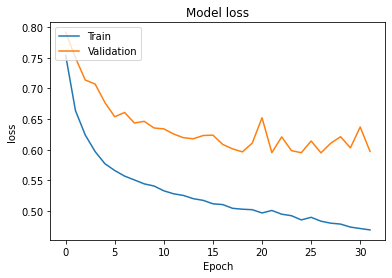

In [139]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

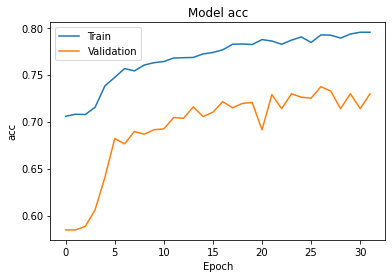

In [140]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [141]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [142]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.6650300054555374


In [143]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=256, activation='relu', recurrent_activation='hard_sigmoid', input_shape=(arr.shape[1], arr.shape[2]),return_sequences=True))
# lstm.add(Dropout(0.2))
lstm.add(LSTM(units=128, activation='relu', input_shape=(12, arr.shape[2])))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 10, 256)           969728    
_________________________________________________________________
lstm_13 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 1,166,977
Trainable params: 1,166,977
Non-trainable params: 0
_________________________________________________________________
None


In [144]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.2, batch_size=512, epochs=200, callbacks=[early_stop])

Epoch 1/200
7/7 [==============================] - 6s 200ms/step - loss: 0.6479 - acc: 0.6035 - val_loss: 0.7964 - val_acc: 0.5619
Epoch 2/200
7/7 [==============================] - 1s 115ms/step - loss: 0.5950 - acc: 0.6953 - val_loss: 0.6740 - val_acc: 0.5619
Epoch 3/200
7/7 [==============================] - 1s 116ms/step - loss: 0.5576 - acc: 0.7141 - val_loss: 0.7255 - val_acc: 0.5619
Epoch 4/200
7/7 [==============================] - 1s 116ms/step - loss: 0.5534 - acc: 0.7036 - val_loss: 0.6721 - val_acc: 0.5619
Epoch 5/200
7/7 [==============================] - 1s 117ms/step - loss: 0.5254 - acc: 0.7179 - val_loss: 0.6546 - val_acc: 0.5619
Epoch 6/200
7/7 [==============================] - 1s 118ms/step - loss: 0.5371 - acc: 0.6953 - val_loss: 0.7554 - val_acc: 0.5666
Epoch 7/200
7/7 [==============================] - 1s 119ms/step - loss: 0.5262 - acc: 0.7115 - val_loss: 0.6498 - val_acc: 0.6005
Epoch 8/200
7/7 [==============================] - 1s 118ms/step - loss: 0.5002 - a

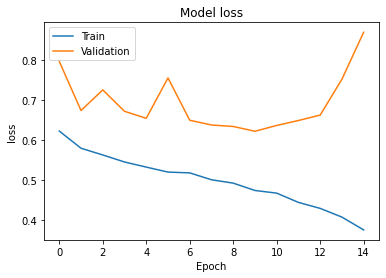

In [145]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

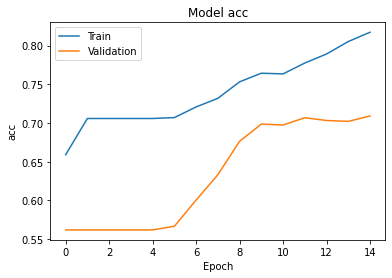

In [146]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [147]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [148]:
pred.shape

(1833, 1)

In [149]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred)) #unit=50

정확도 : 0.6317512274959084
